### What overfitting is ?
#### So overfitting is the term in which the provided model/neural network learn the trainng data so much that it can not perform well on testing data i.e the error on training data is zero(0) and on testing data is high. So to avoid this early stopping is an method used

In [1]:
### lets check how overfiiting happens and who it looks
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [14]:
X,y = make_moons(n_samples=1000,noise=0.25,random_state=42)

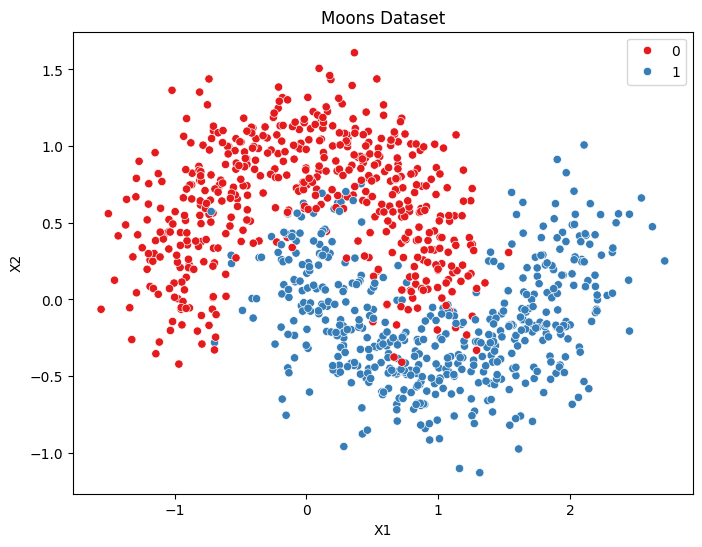

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
plt.title("Moons Dataset")
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="Set1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [24]:
X_train , X_test ,y_train, y_test = train_test_split(X,y,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_test.shape,y_train.shape

((250, 2), (750,))

In [26]:
model = Sequential([
    Dense(64,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy')
history = model.fit(X_train,y_train,validation_split=0.2,epochs=1000)


Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6862 - val_loss: 0.5964
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5841 - val_loss: 0.4896
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4847 - val_loss: 0.3974
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3930 - val_loss: 0.3382
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3649 - val_loss: 0.3076
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3521 - val_loss: 0.2926
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3384 - val_loss: 0.2851
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3329 - val_loss: 0.2798
Epoch 9/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3246 - val_loss: 0.2765
Epoch 10/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3219 - val_loss: 0.2729
Epoch 11/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3241 - val_loss: 0.2703
Epoch 12/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


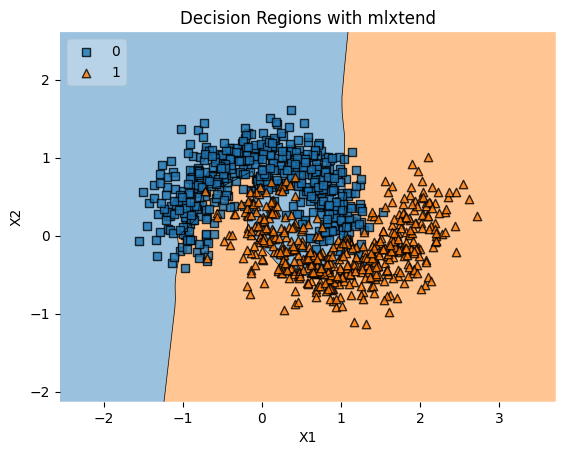

In [27]:
##decision boundaries
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Regions with mlxtend")
plt.show()

### From the above char it is clear that the model is overfitted because the desicion boundaries are well tighted and learned all the pattern

# Early Stopping
### So this is an term or method use to reduce overfitting of neural network
### So in early stopping it works by checking it previous loss as the provided as input it lead to stop when their is no significant change in the loss for the provided number

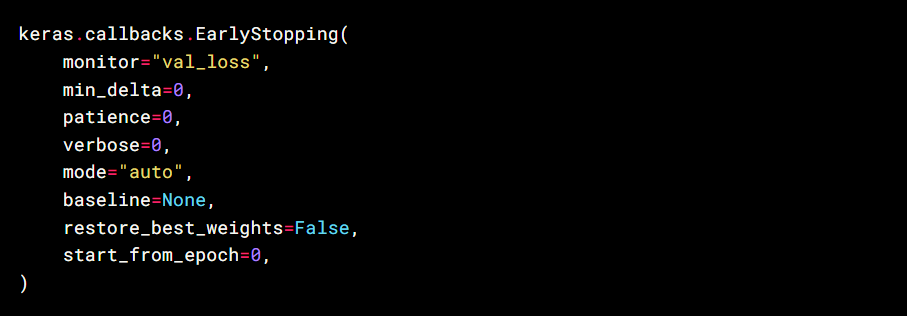

### Explaination of the parameters
#### 1.monitor = which loss we want to monitor i.e which is changing or on which no change we have to stop
#### 2.min_delts = Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.
#### 3.patience = like how many back loss we want to check before stopping
#### 4.verbose = that enables when the training stop showing the term or name "Early Stopped"
#### 5.restore_best_weight = the weights at that stopped epoch
#### 6.start_from_epoch = from which epoch to stop the monitoring default=0
#### 7.mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
#### 8.baseline: Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None

In [28]:
X_train , X_test ,y_train, y_test = train_test_split(X,y,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
import tensorflow
from tensorflow import keras
model = Sequential([
    Dense(64,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy')
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    mode='auto',
    verbose=1
)
history = model.fit(X_train,y_train,validation_split=0.2,epochs=1000,callbacks=[callback])

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6549 - val_loss: 0.5863
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5642 - val_loss: 0.5153
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4942 - val_loss: 0.4443
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4482 - val_loss: 0.3815
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3960 - val_loss: 0.3359
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3530 - val_loss: 0.3108
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3083 - val_loss: 0.2959
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3525 - val_loss: 0.2890
Epoch 9/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3164 - val_loss: 0.2850
Epoch 10/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2943 - val_loss: 0.2813
Epoch 11/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3314 - val_loss: 0.2786
Epoch 12/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


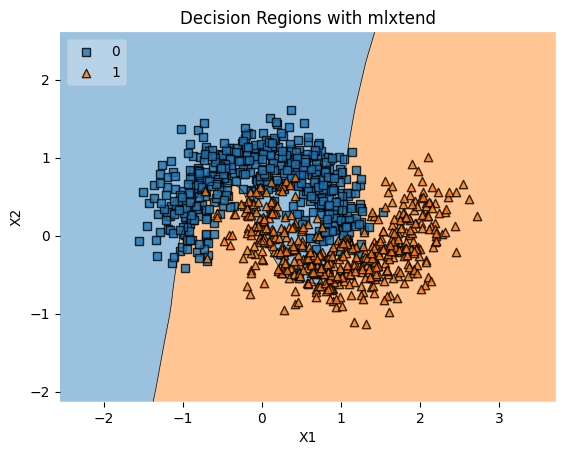

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Regions with mlxtend")
plt.show()

### It is good because some classes are overlapping and in the other region